In [1]:
import torch
import matplotlib.pyplot as plt
import math

from renderer import project_gaussians, rasterize_gaussians
from utils import ellipse_ndim

### Data

In [2]:
mu = torch.tensor([
    [0., 0., 2.],
])

scale = torch.tensor([
    [1., 1., 1.],
])

quat = torch.tensor([
    [0., 0., 0., 0.],
])

col = torch.tensor([
    [1, 0, 0],
])

### Projection

In [3]:
# Output Image Width and Height
W = 1920
H = 1080 

In [4]:
fov_x = math.pi / 2.0 # Angle of the camera frustum 90°
focal = 0.5 * float(W) / math.tan(0.5 * fov_x) # Distance to Image Plane

In [5]:
(
    mu_,
    cov_,
    z
) = project_gaussians(
    means3d=mu,
    scales=scale,
    quats=quat,
    viewmat=torch.eye(4),
    fx=focal,
    fy=focal,
    cx=W/2,
    cy=H/2,
    img_height=H,
    img_width=W
)

(0.0, 1080.0)

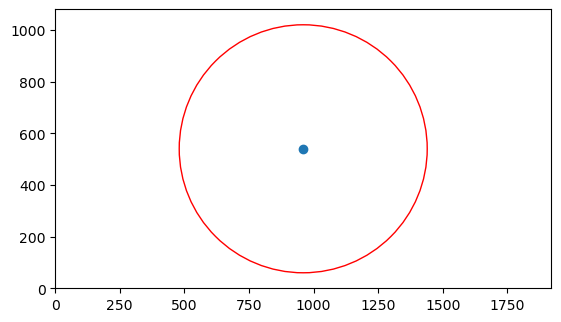

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
ellipse_ndim(mu_, cov_, ax, edgecolor='red')
ax.scatter(mu_[0,0], mu_[0,1])

ax.set_aspect('equal', adjustable='box')
ax.set_xlim([0,W])
ax.set_ylim([0,H])

In [7]:
print(mu_)

tensor([[960., 540.]])


##################################

### Rendering

In [8]:
out_img = rasterize_gaussians(
    xys=mu_,
    depths=z,
    covs=cov_,
    conics=None,
    num_tiles_hit=None,
    colors=col,
    opacity=None,
    img_height=H,
    img_width=W,
    block_width=None,
    background=None,
    return_alpha=None
)

(0.0, 1080.0)

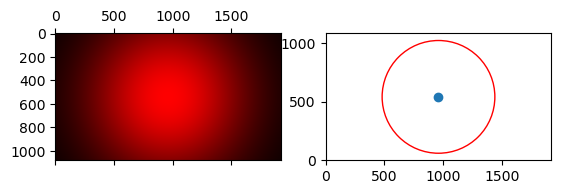

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(out_img)

ellipse_ndim(mu_, cov_, ax2, edgecolor='red')
ax2.scatter(mu_[0,0], mu_[0,1])
# ax2.scatter(mu_[1,0], mu_[1,1])
ax2.set_aspect('equal', adjustable='box')

ax2.set_xlim([0,W])
ax2.set_ylim([0,H])

### Tiling (SAT)